In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from More_futuristic_LSTM import*

In [2]:
df_prices = pd.read_excel('data/train.xlsx', usecols="B:Z")

C:\Users\anton\AppData\Local\Temp\ipykernel_14880\47752094.py:1: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  df_prices = pd.read_excel('data/train.xlsx', usecols="B:Z")


In [3]:
df_days = pd.read_excel('data/train.xlsx', usecols="A")
df_days["PRICES"] = df_days["PRICES"].dt.day_of_week
df_days["a"], df_days["b"], df_days["c"], df_days["v"], df_days["w"], df_days["d"], df_days["e"], df_days["f"], df_days["g"], df_days["h"], df_days["i"], df_days["j"], df_days["k"], df_days["l"], df_days["m"], df_days["n"], df_days["o"], df_days["p"], df_days["q"], df_days["r"], df_days["s"], df_days["t"], df_days["u"] = [df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"]]
df_days = df_days.to_numpy().flatten()

In [4]:
df_week = pd.read_excel('data/train.xlsx', usecols="A")
df_week["PRICES"] = df_week["PRICES"].dt.isocalendar().week - 1
df_week["a"], df_week["b"], df_week["c"], df_week["v"], df_week["w"], df_week["d"], df_week["e"], df_week["f"], df_week["g"], df_week["h"], df_week["i"], df_week["j"], df_week["k"], df_week["l"], df_week["m"], df_week["n"], df_week["o"], df_week["p"], df_week["q"], df_week["r"], df_week["s"], df_week["t"], df_week["u"] = [df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"]]
df_week = df_week.to_numpy().flatten()

In [5]:
df_month = pd.read_excel('data/train.xlsx', usecols="A")
df_month["PRICES"] = df_month["PRICES"].dt.month - 1
df_month["a"], df_month["b"], df_month["c"], df_month["v"], df_month["w"], df_month["d"], df_month["e"], df_month["f"], df_month["g"], df_month["h"], df_month["i"], df_month["j"], df_month["k"], df_month["l"], df_month["m"], df_month["n"], df_month["o"], df_month["p"], df_month["q"], df_month["r"], df_month["s"], df_month["t"], df_month["u"] = [df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"]]
df_month = df_month.to_numpy().flatten()

In [6]:
df_hour = np.arange(24)
df_hour = np.tile(df_hour, df_prices.shape[0])


In [7]:
df_prices = df_prices.to_numpy().flatten()
len(df_prices)

26304

In [8]:
observations = pd.DataFrame({
    "prices": df_prices, 
    "hour": df_hour,
    "day": df_days,
    "week": df_week,
    "month" : df_month
})

In [9]:
np.max(df_week)

52

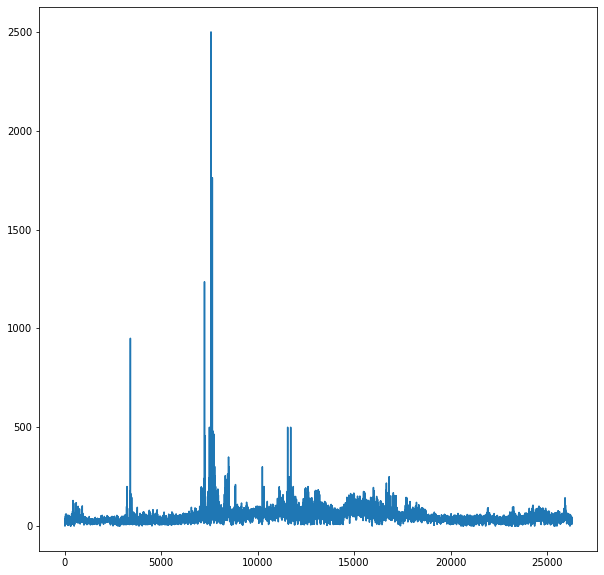

In [10]:
plt.figure(figsize=(10,10))
plt.plot(df_prices)

In [11]:
observations['weekend'] = observations['day'].apply(lambda x: 1 if x > 4 else 0)
observations.to_csv('data/train_processed.csv')

In [12]:
df = pd.read_csv('data/train_processed.csv')
model,Y_pred = LSTM_Train(df, num_time_steps=24,num_predict_steps=4, units=100, epochs=3, batch_size=32)

X.shape:  (26276, 24)     Y.shape:  (26276, 4)
Epoch 1/3
822/822 [==============================] - 9s 9ms/step - loss: 0.5548
Epoch 2/3
822/822 [==============================] - 8s 10ms/step - loss: 0.4856
Epoch 3/3
822/822 [==============================] - 3s 3ms/step


In [21]:
crucial_time_points=find_null_derivatives_points(Y_pred)
observations['lstm_indicator'] = df.index.isin(crucial_time_points).astype(int)

In [22]:
observations.to_csv('data/train_processed_wth_lstm.csv')
observations['lstm_indicator'][:11]


0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
Name: lstm_indicator, dtype: int32